In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:10<00:00, 249MB/s]
100% 1.06G/1.06G [00:10<00:00, 111MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalization
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#create CNN validation
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 101ms/step - loss: 1.1091 - accuracy: 0.6029 - val_loss: 0.6191 - val_accuracy: 0.6570
Epoch 2/10
625/625 [==============================] - 63s 100ms/step - loss: 0.5401 - accuracy: 0.7352 - val_loss: 0.5354 - val_accuracy: 0.7476
Epoch 3/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4539 - accuracy: 0.7890 - val_loss: 0.7463 - val_accuracy: 0.7048
Epoch 4/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3947 - accuracy: 0.8241 - val_loss: 0.4467 - val_accuracy: 0.7948
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3348 - accuracy: 0.8530 - val_loss: 0.5080 - val_accuracy: 0.7568
Epoch 6/10
625/625 [==============================] - 62s 100ms/step - loss: 0.2555 - accuracy: 0.8965 - val_loss: 0.5593 - val_accuracy: 0.7762
Epoch 7/10
625/625 [==============================] - 63s 100ms/step - loss: 0.1864 - accuracy: 0.9287 - val_loss: 0.4590 - val_ac

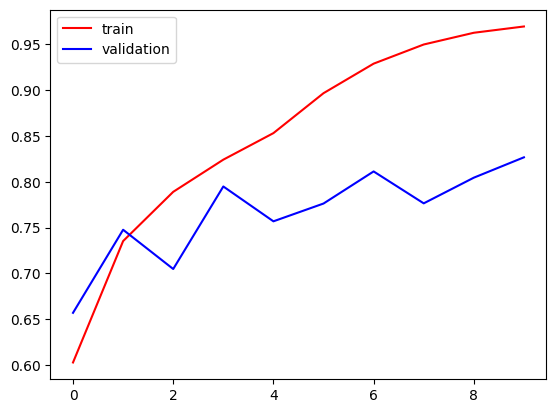

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

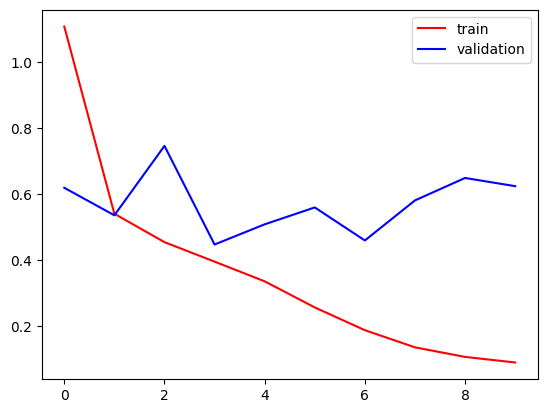

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()